# Jacobsville pmag tilt correction orientation compilation

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet  # in PATH?
from pyproj import Proj
%matplotlib inline
%config InlineBackend.figure_format='retina'

## calculate bedding orientation for Natural Wall section 1 specimen 10 to 15

Only re-calculating this orientation because there isn't one cauclulated in the field. This is based on analyzing field noes and planes taken at the time at the location. Refer to NSH Clino export for details.

In [12]:
NW1_10_15_data = pd.read_csv('../Data/NW1_10_15_bedding.csv')
NW1_10_15_data.shape[0]

11

In [6]:
NW1_10_15_data['strike'] = NW1_10_15_data[' dipAzimuth'] - 90
NW1_10_15_data['pole_trend'] = NW1_10_15_data[' dipAzimuth'] - 180
NW1_10_15_data['pole_plunge'] = 90 - NW1_10_15_data[' dip']
NW1_10_15_mean_pole = ipmag.fisher_mean(NW1_10_15_data['pole_trend'].tolist(),NW1_10_15_data['pole_plunge'].tolist())
NW1_10_15_mean_strike = NW1_10_15_mean_pole['dec'] + 90
if NW1_10_15_mean_strike > 360:
    NW1_10_15_mean_strike = NW1_10_15_mean_strike - 360
NW1_10_15_mean_dip = 90 - NW1_10_15_mean_pole['inc']

print('mean strike: ', NW1_10_15_mean_strike, 'mean dip: ', NW1_10_15_mean_dip)

mean strike:  201.25462002947177 mean dip:  83.18083940557723


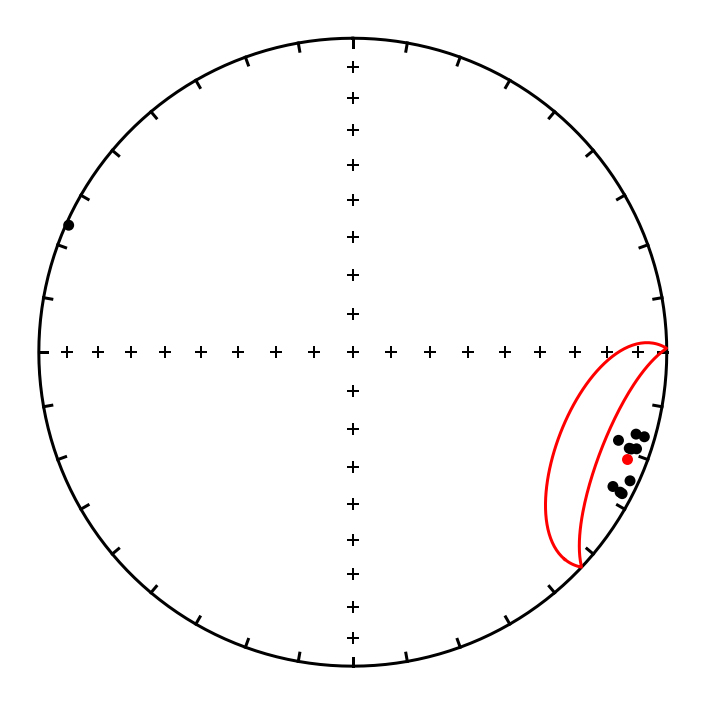

In [7]:
fignum = 4
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NW1_10_15_data['pole_trend'].tolist(),NW1_10_15_data['pole_plunge'].tolist())
ipmag.plot_di_mean(NW1_10_15_mean_pole['dec'],NW1_10_15_mean_pole['inc'],NW1_10_15_mean_pole['alpha95'],color='red')

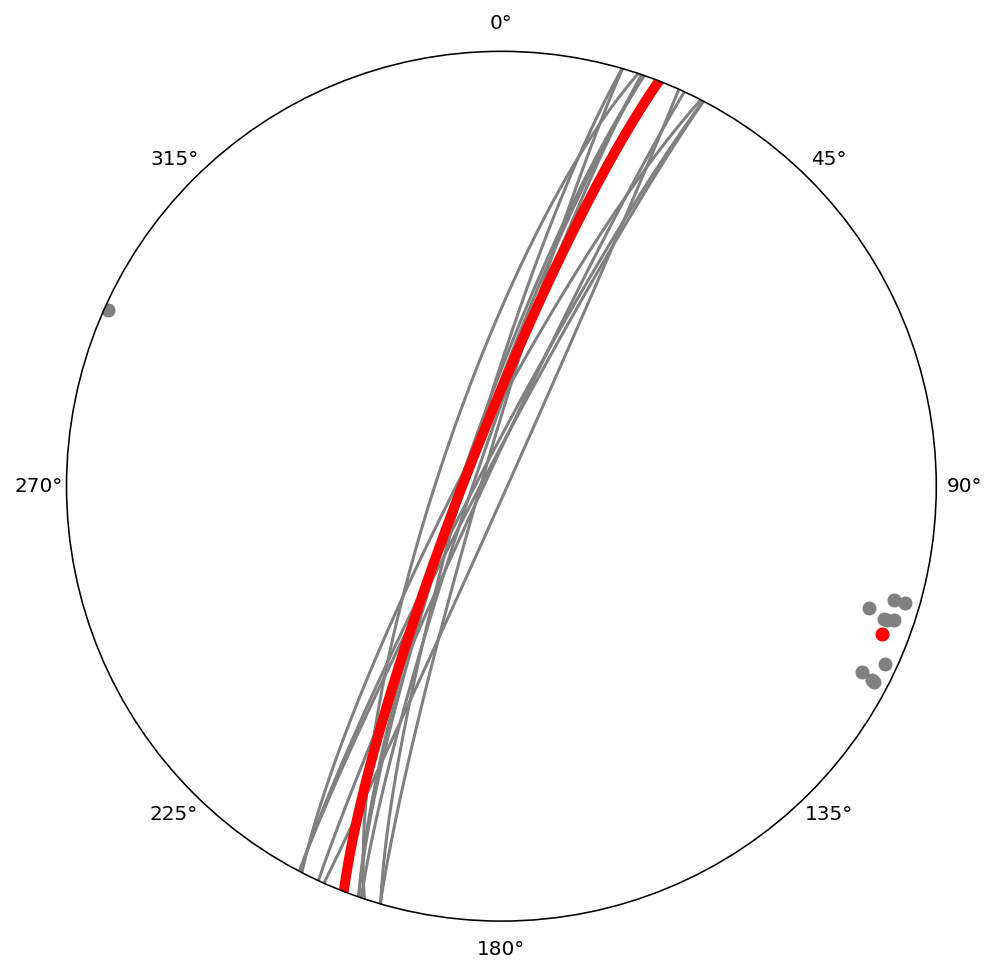

dip trend/dip: 291.3 83.2


In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(NW1_10_15_data['strike'], NW1_10_15_data[' dip'],color='grey')
ax.plane(NW1_10_15_mean_strike, NW1_10_15_mean_dip,color='red',linewidth=5)
ax.pole(NW1_10_15_data['strike'], NW1_10_15_data[' dip'],color='grey')
ax.pole(NW1_10_15_mean_strike, NW1_10_15_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(NW1_10_15_mean_strike+90,1),  round(NW1_10_15_mean_dip, 1))

# Summary of bedding orientations for specifical pmag specimens at different sites

This is a combination of work done in the field and calculated above. 

| site | samples           | dip  | dip_trend | N  |
|------|-------------------|------|-----------|----|
| NW1  | 1,2,7,8,9         | 112  | 97        | 5  |
| NW1  | 3,4,5,6           | 121  | 96        | 10 |
| NW1  | 10,11,12,13,14,15 | 83.2 | 291.3     | 11 |
| NW2  | all               | 2    | 204       | 4  |
| SC1  | 1 to 5            | 95   | 160       | 1  |
| SC1  | 6 to 11           | 93   | 164       | 8  |
| SC1  | 12 to 31          | 81   | 157       | 9  |
| SC1  | 32 to 41          | 39   | 160       | 8  |
| SC1  | 42 to 56          | 3    | 178       | 11 |
| SC1  | 57 to 61          | 93   | 164       | 8  |
| SC1  | 62 to 65          | 4    | 85        | 8  |
| SC1  | 66 to 67          | 4    | 120       | 4  |
| SC1  | 68 to 73          | 4    | 135       | 6  |
| SC1  | 74 to 75          | 7    | 151       | 6  |
| AF1  | all               | 1    | 322       | 15 |
| JK2  | all               | 9    | 75        | 1  |
| JK3  | 1 to 5            | 17   | 288       | 4  |
| JK3  | 6,7               | 10.5 | 265       | 2  |
| JK3  | 8                 | 10   | 292       | 4  |

- site: site name
- samples: core samples within a particular site
- dip: average dip of the bedding plane
- dip_trend: average dip trend or dip direction of the bedding plane 
- N: number of averaged measurements